In [2]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join

In [5]:
VN30=listdir('E:\\XLDC\\13_03\\data_VN30')
for i in range(30):
    VN30[i]=VN30[i].replace('.csv','')

In [7]:
def read(path):
    data_set=[]
    onlyfiles = [ f for f in listdir(path) if isfile(join(path,f)) ]
    for n in range(len(onlyfiles)):
        temp=pd.read_csv(join(path,onlyfiles[n]))
        data_set.append(temp)
    return np.array(data_set)

In [8]:
data=read('E:\\XLDC\\13_03\\data_VN30')

In [9]:
dct=dict()
for i in range(30):
    dct[VN30[i]]=list(data[i].T[1])[::-1]

In [10]:
new = pd.DataFrame.from_dict(dct,orient='index').T
#new.to_csv('VN30_final_2.csv')

In [11]:
data_new=new.copy()
for i in VN30:
    temp=list()
    for j in data_new[i]:
        temp.append(float(j.replace(",","")))
    data_new[i]=temp

In [ ]:
data_new.to_csv('VN30_final_fixed.csv')

In [12]:
data_new

,ACB,BID,BVH,CTG,FPT,GAS,GVR,HDB,HPG,KDH,...,STB,TCB,TPB,VCB,VHM,VIC,VJC,VNM,VPB,VRE
0,26360.0,34308.5,60500.0,29403.0,65930.9,91100.0,30900.0,21320.0,34217.5,28318.0,...,19200.0,40050.0,21185.2,74167.0,76017.0,94133.0,135000.0,102200.0,24722.5,34650.0
1,26800.0,34031.5,60100.0,29441.0,65930.9,91100.0,30300.0,21320.0,34254.3,28500.0,...,18900.0,40100.0,21259.3,74555.0,75941.0,94222.0,135000.0,102200.0,24889.2,34450.0
2,26760.0,33556.6,59600.0,29209.0,69809.2,90300.0,29450.0,21440.0,33959.7,28409.0,...,18900.0,39850.0,21111.1,74090.0,75713.0,93689.0,134600.0,101000.0,24639.2,34800.0
3,26800.0,34268.9,59600.0,30642.0,69636.8,92800.0,29700.0,22000.0,34107.0,28636.0,...,19600.0,40300.0,21259.3,74013.0,75561.0,93067.0,133500.0,100500.0,24778.0,34850.0
4,27160.0,35614.3,60700.0,31378.0,69809.2,91800.0,30700.0,22000.0,34328.0,29273.0,...,19700.0,41950.0,21481.5,75484.0,75865.0,94756.0,134900.0,102500.0,25472.5,35000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,33250.0,42250.0,58900.0,32150.0,93800.0,124600.0,36750.0,27400.0,51100.0,53800.0,...,31500.0,49250.0,39000.0,84900.0,76200.0,78500.0,134200.0,76800.0,37700.0,32900.0
246,32600.0,41600.0,58400.0,32050.0,94800.0,120700.0,36300.0,27350.0,49450.0,52100.0,...,30850.0,49000.0,38800.0,81500.0,74600.0,77900.0,137000.0,76100.0,37000.0,32500.0
247,32700.0,40500.0,56400.0,32000.0,95500.0,122200.0,36000.0,27000.0,49850.0,51200.0,...,31100.0,49100.0,38800.0,83000.0,74000.0,78000.0,140000.0,75100.0,36850.0,31600.0
248,32900.0,40950.0,57400.0,32100.0,94600.0,118500.0,35550.0,26950.0,49150.0,51500.0,...,31550.0,49250.0,39000.0,83500.0,75200.0,79100.0,139000.0,77100.0,36750.0,32000.0


In [16]:

R=data_new.copy()
for id in VN30:
    temp=list()
    for i in range(1,len(R[id])):
        temp.append(round(((R[id][i]-R[id][i-1])/R[id][i-1])*100,2))
    temp.append(round(((R[id][i]-R[id][i-1])/R[id][i-1])*100,2))
    R[id]=temp

Phần PCA

In [13]:
X_scaled = data_new - np.mean(data_new,axis=0)

features = X_scaled.T

cov_matrix = np.cov(features)
values, vectors = np.linalg.eig(cov_matrix)

explained_variances = []
for i in range(len(values)):
    explained_variances.append(((values[i] / np.sum(values))*100).real)

print(np.sum(explained_variances), '\n', explained_variances[:8])

99.99999999999999 
 [69.0310007718281, 12.119582839857419, 5.550821366279609, 3.743667083971646, 3.0402135767398, 1.576146137895929, 1.0154656624813372, 0.8100249647076705]


In [79]:
np.sum(explained_variances[:2])

81.15058361168552

<AxesSubplot:>

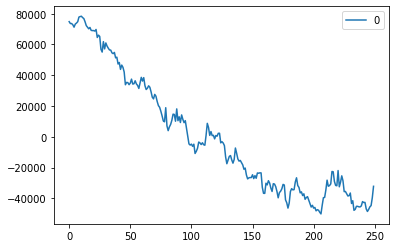

In [14]:
projected_1 = (vectors[:,0].T).dot(X_scaled.T)
#projected_2 = (vectors[:,1].T).dot(X_scaled.T)
pd.DataFrame(projected_1).plot()

Bước 1. Tính vector trung bình của toàn bộ dữ liệu:  $\bar{\mathbf{x}} = \frac{1}{n} \sum_{n=1}^N \mathbf{x}_n$

In [ ]:
def mean(data):
    sum=0
    v_sum=[]
    for i in range(len(data)):
        sum=sum+data[i]
        v_sum

In [ ]:
def PCA(data):
    return 0